# Naive Bayes Model with Different Vectorization Techniques

In [38]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import pickle
from sklearn.model_selection import train_test_split

In [39]:
# load y_lem 
with open('y_lem.pkl', 'rb') as f :
    y_lem = pickle.load(f)

## Naive Bayes with TF-IDF

In [41]:
# load X_tfidf and X_count
with open('X_tfidf.pkl' , 'rb') as f:
    X_tfidf = pickle.load(f)
################################

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_lem, test_size=0.2, random_state=20)

In [43]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_tfidf = MultinomialNB(alpha = .01)

In [44]:
%%time
naive_bayes_tfidf.fit(X_train, y_train)
naive_bayes_predictions_tfidf = naive_bayes_tfidf.predict(X_test)

Wall time: 201 ms


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, naive_bayes_predictions_tfidf))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      4683
           1       0.11      0.60      0.18       274

    accuracy                           0.70      4957
   macro avg       0.54      0.65      0.50      4957
weighted avg       0.92      0.70      0.78      4957



<AxesSubplot:>

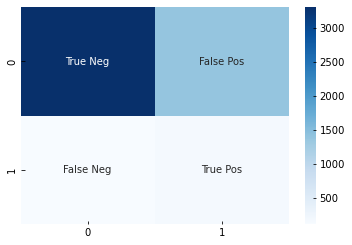

In [46]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, naive_bayes_predictions_tfidf)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm,annot=labels, fmt='', cmap="Blues")

In [47]:
# dumping the model
with open('naiveBayes_tfidf_model.pkl','wb') as files:
    pickle.dump(naive_bayes_tfidf, files)

## Naive Bayes with Count Vectorization

In [48]:
with open('X_count.pkl' , 'rb') as f:
    X_count = pickle.load(f)

In [49]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_count, y_lem, test_size=0.2, random_state=20)

In [50]:
naive_bayes_count = MultinomialNB(alpha = .01)

In [51]:
%%time
naive_bayes_count.fit(X_train_c, y_train_c)
naive_bayes_predictions_count = naive_bayes_count.predict(X_test_c)

Wall time: 84.7 ms


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, naive_bayes_predictions_count))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4683
           1       0.21      0.32      0.26       274

    accuracy                           0.90      4957
   macro avg       0.59      0.63      0.60      4957
weighted avg       0.92      0.90      0.91      4957



<AxesSubplot:>

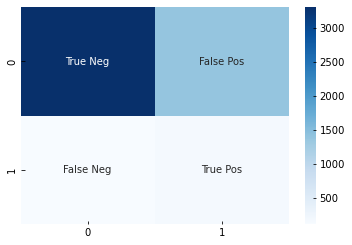

In [53]:
cfm_c = confusion_matrix(y_test_c, naive_bayes_predictions_count)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm,annot=labels, fmt='', cmap="Blues")

In [54]:
# dumping the model
with open('naiveBayes_count_model.pkl','wb') as files:
    pickle.dump(naive_bayes_count, files)